<a href="https://colab.research.google.com/github/msboralugoda/Computer-Vision/blob/main/CV_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


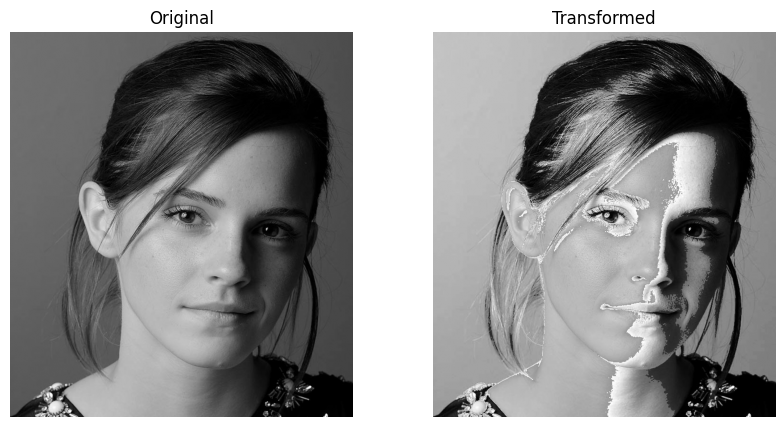

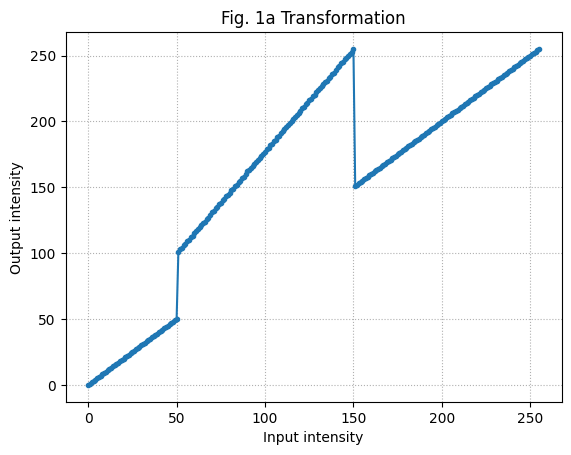

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read grayscale image
f = cv.imread("/content/drive/MyDrive/Colab Notebooks/Computer Vision/a1images/a1images/emma.jpg", cv.IMREAD_GRAYSCALE)

t1 = np.arange(0, 51) #step size is 1
t2 = np.linspace(100, 255, 101)
t3 = np.arange(150, 256)

# Concatenate into one mapping table and Remove duplicate points at the joins (50 and 150)
T = np.concatenate((t1, t2[1:], t3[1:])).astype(np.uint8)


# Apply transformation

g = T[f]


plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(f, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(g, cmap='gray'); plt.title('Transformed'); plt.axis('off')
plt.show()

# Plot transformation function
plt.plot(np.arange(256), T, '-o', markersize=3)
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.title("Fig. 1a Transformation")
plt.grid(True, ls=":")
plt.show()

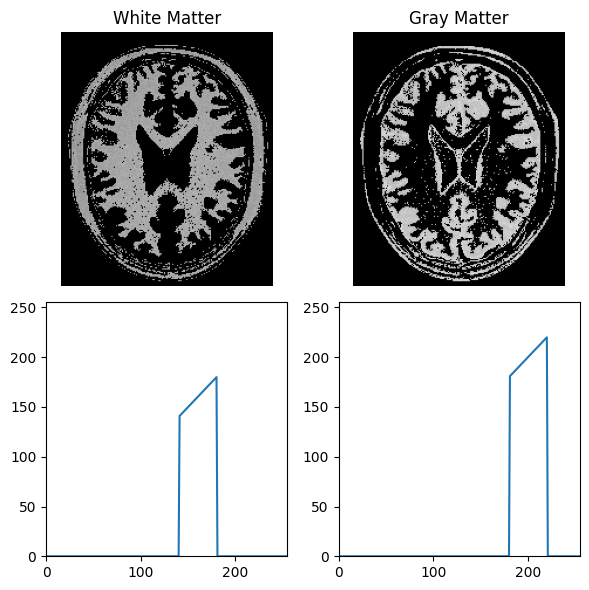

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision/a1images/a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

t_white = np.zeros(256, dtype='uint8')
t_white[141:181] = np.linspace(141, 180, 40).astype('uint8')

t_gray = np.zeros(256, dtype='uint8')
t_gray[181:221] = np.linspace(181, 220, 40).astype('uint8')

white_matter = cv.LUT(img_orig, t_white)
gray_matter = cv.LUT(img_orig, t_gray)

fig, ax = plt.subplots(2, 2, figsize=(6, 6))
ax[0,0].imshow(white_matter, cmap='gray', vmin=0, vmax=255)
ax[0,0].set_title('White Matter')
ax[0,0].axis('off')
ax[1,0].plot(t_white)
ax[1,0].set_ylim([0, 255])
ax[1,0].set_xlim([0, 255])
ax[0,1].imshow(gray_matter, cmap='gray', vmin=0, vmax=255)
ax[0,1].set_title('Gray Matter')
ax[0,1].axis('off')
ax[1,1].plot(t_gray)
ax[1,1].set_ylim([0, 255])
ax[1,1].set_xlim([0, 255])
plt.tight_layout()
plt.show()

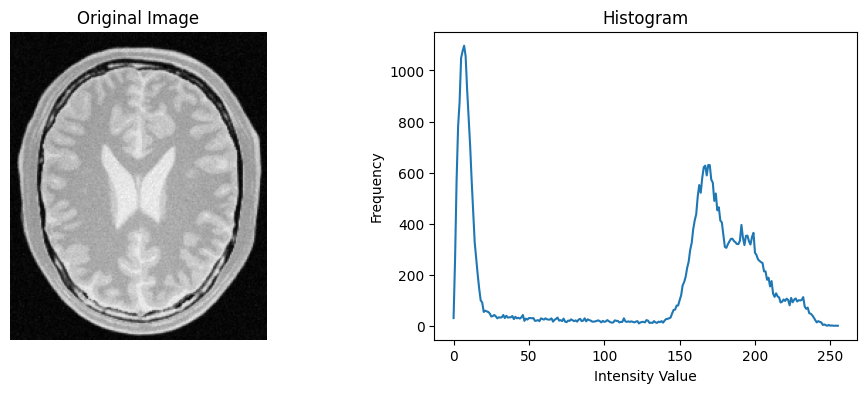

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision/a1images/a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

hist, bins = np.histogram(img.ravel(), 256, [0, 256])
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].plot(hist)
ax[1].set_title('Histogram')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()

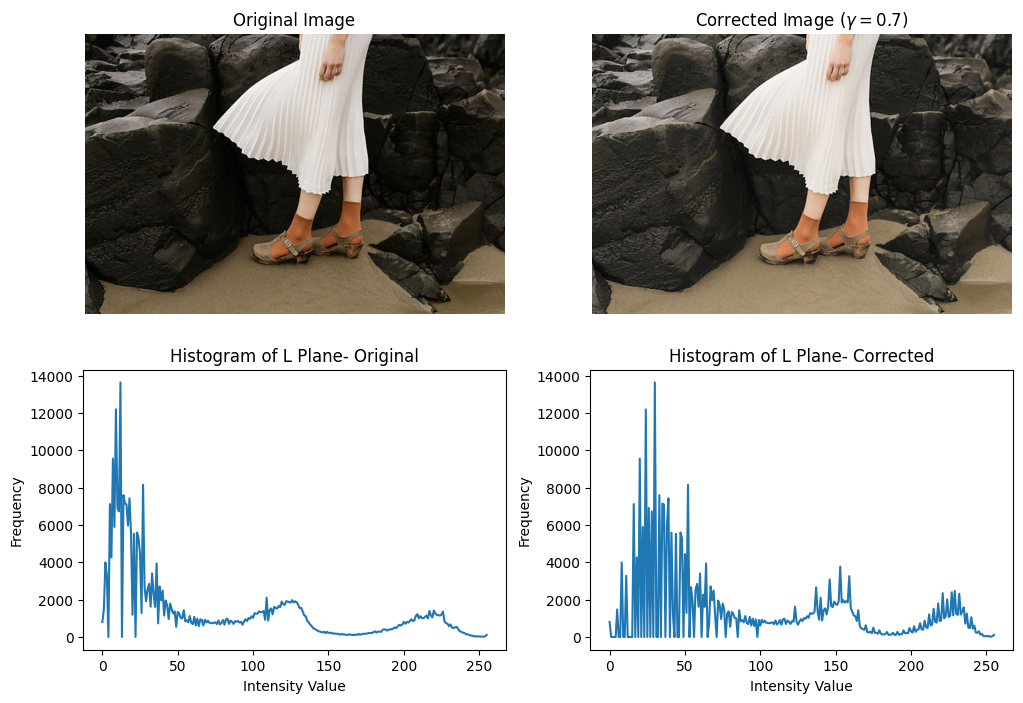

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision/a1images/a1images/highlights_and_shadows.jpg')
img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)  #Convert to LAB color space
img_l = img_lab[:, :, 0].copy()  # Extract the L channel[width,height,channel_index]

# Apply gamma correction to L channel
gamma = 0.7
t = np.array([(i/255)** gamma * 255 for i in np.arange(256)], dtype='uint8')
gamma_corrected_l = cv.LUT(img_l, t) #replaces each pixel value in img with the adaala lookup table value

img_lab[:, :, 0] = gamma_corrected_l  # Replace L channel with corrected values
img_corrected = cv.cvtColor(img_lab, cv.COLOR_LAB2BGR)  # Convert back to BGR color space

# # Histogram of the original and corrected L channel
hist_orig, bins_orig = np.histogram(img_l.ravel(), 256, [0, 256]) #(1D array of values,no. of bins,range of possible values)
hist_corrected, bins_corrected = np.histogram(gamma_corrected_l.ravel(), 256, [0, 256])

fig, axis = plt.subplots(2, 2, figsize=(12, 8))
axis[0,0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
axis[0,0].set_title('Original Image')
axis[0,0].axis('off')
axis[0,1].imshow(cv.cvtColor(img_corrected, cv.COLOR_BGR2RGB))
axis[0,1].set_title(r'Corrected Image ($\gamma = {gamma}$)'.format(gamma=gamma))
axis[0,1].axis('off')

axis[1,0].plot(hist_orig)
axis[1,0].set_title('Histogram of L Plane- Original')
axis[1,0].set_xlabel('Intensity Value')
axis[1,0].set_ylabel('Frequency')
axis[1,1].plot(hist_corrected)
axis[1,1].set_title('Histogram of L Plane- Corrected')
axis[1,1].set_xlabel('Intensity Value')
axis[1,1].set_ylabel('Frequency')

plt.show()

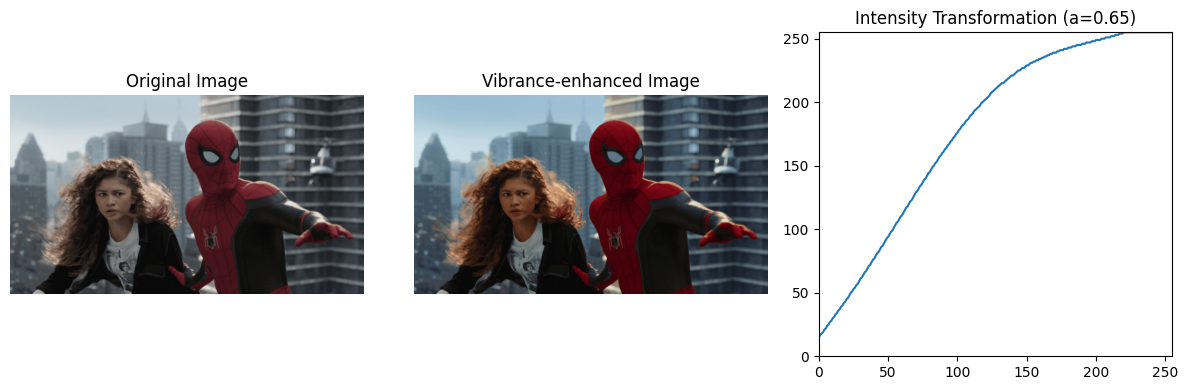

In [27]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision/a1images/a1images/spider.png')
img_hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)  # Convert to HSV color space
h, s, v = cv.split(img_hsv)  # Split into H, S, V planes

a = 0.65
sigma = 70
x = np.arange(256)
t = np.minimum(x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma **2)), 255).astype('uint8')  # Transformation function
s_transformed = cv.LUT(s, t)  # Apply transformation to S plane
img_transformed = cv.merge((h, s_transformed, v))  # Merge 3 planes

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(img_transformed, cv.COLOR_HSV2RGB))
ax[1].set_title('Vibrance-enhanced Image')
for i in ax[0:2]:
    i.axis('off')
ax[2].plot(t)
ax[2].set_ylim([0, 255])
ax[2].set_xlim([0, 255])
ax[2].set_title(r'Intensity Transformation (a={a})'.format(a=a))
plt.tight_layout()
plt.show()

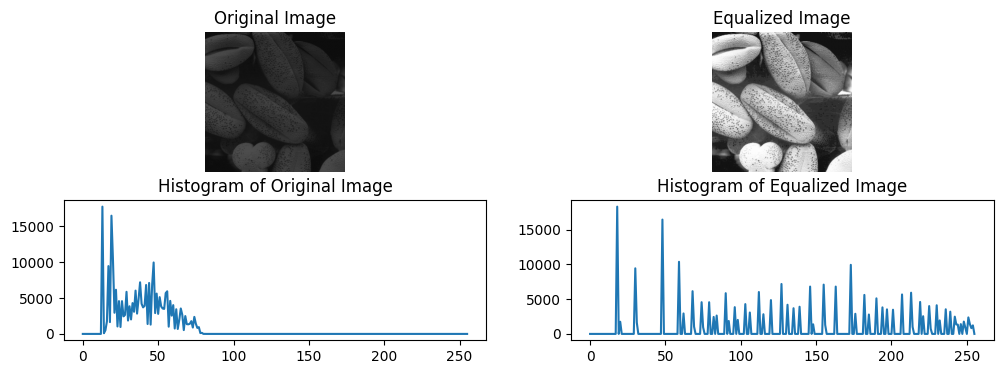

In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision/a1images/a1images/shells.tif', cv.IMREAD_GRAYSCALE)

M, N = img_orig.shape
L = 256
hist_orig, bins_orig = np.histogram(img_orig.ravel(), 256, [0, 256])
cdf = hist_orig.cumsum()  # Cumulative distribution function
t = np.array([(L-1) / (M*N) * cdf[i] for i in range(256)]).astype('uint8')  # Transformation function
img_eq = cv.LUT(img_orig, t)
hist_eq, bins_eq = np.histogram(img_eq.ravel(), 256, [0, 256])

fig, ax = plt.subplots(2, 2, figsize=(12, 4))
ax[0,0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[0,0].set_title('Original Image')
ax[0,1].imshow(img_eq, cmap='gray', vmin=0, vmax=255)
ax[0,1].set_title('Equalized Image')
ax[1,0].plot(hist_orig)
ax[1,0].set_title('Histogram of Original Image')
ax[1,1].plot(hist_eq)
ax[1,1].set_title('Histogram of Equalized Image')
for i in ax[0, :]:
    i.axis('off')

plt.show()

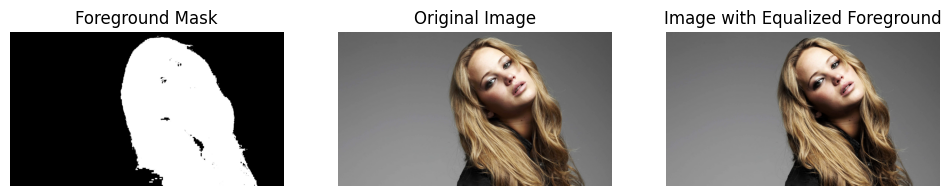

In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision/a1images/a1images/jeniffer.jpg')
img_hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
h, s, v = cv.split(img_hsv)

_, mask = cv.threshold(s, 13, 255, cv.THRESH_BINARY)  # Apply thesholding to saturation plane
foreground = cv.bitwise_and(img_orig, img_orig, mask=mask)  # Extract foreground using mask
background = cv.bitwise_and(img_orig, img_orig, mask=cv.bitwise_not(mask))  # Extract background

foreground_hsv = cv.cvtColor(foreground, cv.COLOR_BGR2HSV)
h_foreground, s_foreground, v_foreground = cv.split(foreground_hsv)
hist, bins = np.histogram(v_foreground[mask > 0].ravel(), 256, [0, 256])  # Histogram of value plane
cdf = hist.cumsum()  # Cumulative distribution function
L = 256
MN = v_foreground[mask > 0].size
t = np.array([(L-1) / (MN) * cdf[i] for i in range(256)]).astype('uint8')
v_foreground_eq = v_foreground.copy()
v_foreground_eq[mask > 0] = t[v_foreground[mask > 0]]
foreground_eq = cv.merge((h_foreground, s_foreground, v_foreground_eq))
foreground_eq = cv.cvtColor(foreground_eq, cv.COLOR_HSV2BGR)  # Convert back to BGR color space
img_modified = cv.add(foreground_eq, background)  # Combine modified foreground with background

fig, axis = plt.subplots(1, 3, figsize=(12, 8))
axis[0].imshow(mask, cmap='gray')
axis[0].set_title('Foreground Mask')
axis[1].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
axis[1].set_title('Original Image')
axis[2].imshow(cv.cvtColor(img_modified, cv.COLOR_BGR2RGB))
axis[2].set_title('Image with Equalized Foreground')
for i in axis:
    i.axis('off')


# ----- Plotting the histrograms of the value plane -----

# hist_eq, bins_eq = np.histogram(v_foreground_eq[mask > 0].ravel(), 256, [0, 256])
# fig, ax = plt.subplots(1, 2, figsize=(12, 4))
# ax[0].plot(hist)
# ax[0].set_title('Histogram of Value Plane of Foreground')
# ax[0].set_xlabel('Intensity Value')
# ax[0].set_ylabel('Frequency')
# ax[1].plot(hist_eq)
# ax[1].set_title('Histogram of Equalized Value Plane of Foreground')
# ax[1].set_xlabel('Intensity Value')
# ax[1].set_ylabel('Frequency')


# ----- Plotting the foreground -----

# fig, ax = plt.subplots(1, 1, figsize=(12, 4))
# ax.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
# ax.axis('off')


# ----- Plotting the 3 planes of HSV -----

# fig, ax = plt.subplots(1, 3, figsize=(12,4))
# ax[0].imshow(h, cmap='gray')
# ax[0].set_title('Hue')
# ax[1].imshow(s, cmap='gray')
# ax[1].set_title('Saturation')
# ax[2].imshow(v, cmap='gray')
# ax[2].set_title('Value')
# for i in ax:
#     i.axis('off')
plt.show()